In [867]:
import pandas as pd
import numpy as np
import glob, os, re

import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [868]:
with open("/Users/henricobela/Desktop/Estudos/Github/portfolio/Machine Learning/Aluguel de Imoveis 2022/data/Dataset Glossary.txt", "r") as file:
    glossary = file.readlines()

In [869]:
for i in glossary:
    print(i)

BHK: Number of Bedrooms, Hall, Kitchen.



Rent: Rent of the Houses/Apartments/Flats.



Size: Size of the Houses/Apartments/Flats in Square Feet.



Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)



Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.



Area Locality: Locality of the Houses/Apartments/Flats.



City: City where the Houses/Apartments/Flats are Located.



Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.



Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.



Bathroom: Number of Bathrooms.



Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.


In [870]:
df = pd.read_csv("/Users/henricobela/Desktop/Estudos/Github/portfolio/Machine Learning/Aluguel de Imoveis 2022/data/House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [871]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [872]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [873]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [875]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [876]:
for column in df.columns:
    print(f"{column}\n{df[column].value_counts()}\n\n")

Posted On
2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
             ... 
2022-04-24      6
2022-04-25      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: Posted On, Length: 81, dtype: int64


BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64


Rent
15000    275
10000    248
12000    238
20000    175
8000     162
        ... 
4600       1
79500      1
76000      1
45002      1
5800       1
Name: Rent, Length: 243, dtype: int64


Size
1000    240
600     225
800     220
1200    193
500     192
       ... 
2770      1
1252      1
904       1
721       1
855       1
Name: Size, Length: 615, dtype: int64


Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: i

In [877]:
df[df['Area Type'] == 'Built Area']

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3079,2022-06-21,2,15000,1000,1 out of 2,Built Area,"Chromepet, GST Road",Chennai,Furnished,Bachelors/Family,2,Contact Owner
3966,2022-06-17,1,6000,500,5 out of 5,Built Area,Seri Lingampally,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner


In [878]:
df.drop([3079,3966], axis = 'rows', inplace = True)

In [879]:
df[df['Point of Contact'] == 'Contact Builder']

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4061,2022-06-18,1,5500,400,1 out of 2,Super Area,"Ramanthapur, NH 2 2",Hyderabad,Unfurnished,Bachelors/Family,1,Contact Builder


In [880]:
df.drop(4061, axis = 'rows', inplace = True)

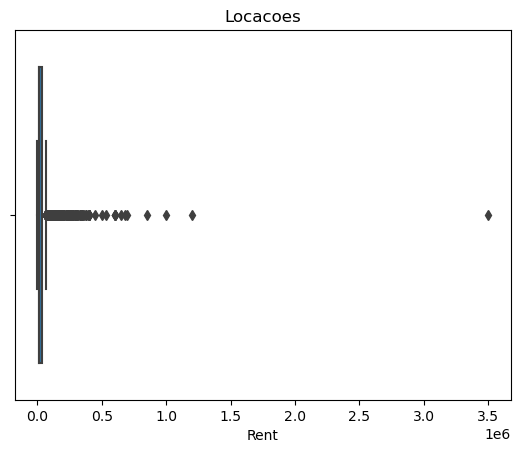

In [881]:
sns.boxplot(x = df.Rent)
plt.title('Locacoes');

In [882]:
alt.Chart(df).mark_circle().encode(y = 'Rent')

alt.Chart(...)

In [883]:
alt.Chart(df).mark_circle().encode(x='BHK')

alt.Chart(...)

In [884]:
df[df.Rent > 100_000].index

Int64Index([ 104,  530,  531,  533,  542,  543,  545,  556,  560,  579,
            ...
            4041, 4097, 4161, 4185, 4241, 4425, 4457, 4543, 4669, 4716],
           dtype='int64', length=280)

In [885]:
df.drop(df[df.Rent > 100_000].index, axis = 'rows', inplace = True)

In [886]:
df.Floor = [row.replace('Ground','0') for row in df.Floor]

def check_floor(row):
    if 'Upper' in row:
        return True
    elif 'Lower' in row:
        return True
    else: return False

df['not_useful'] = [check_floor(row) for row in df.Floor]

df = df[df.not_useful == False]

def return_modular(my_list):
    if(len(my_list) < 2):
        return 0
    else:
        num1 = float(my_list[0])
        num2 = float(my_list[3])
        return num1 / num2
    
df['Floor_modular'] = [return_modular(row.split(' ')) for row in df.Floor]

In [887]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,not_useful,Floor_modular
0,2022-05-18,2,10000,1100,0 out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,False,0.000000
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,False,0.333333
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,False,0.333333
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,False,0.500000
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,False,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,False,0.600000
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,False,0.250000
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,False,0.600000
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,False,0.676471


In [888]:
df.drop(['Posted On', 'Area Locality','not_useful','Floor'], axis='columns', inplace=True)

In [889]:
df = pd.get_dummies(df, columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])

In [890]:
df

,BHK,Rent,Size,Bathroom,Floor_modular,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner
0,2,10000,1100,2,0.000000,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
1,2,20000,800,1,0.333333,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,2,17000,1000,1,0.333333,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,2,10000,800,1,0.500000,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
4,2,7500,850,1,0.500000,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,0.600000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4742,3,29000,2000,3,0.250000,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4743,3,35000,1750,3,0.600000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4744,3,45000,1500,2,0.676471,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


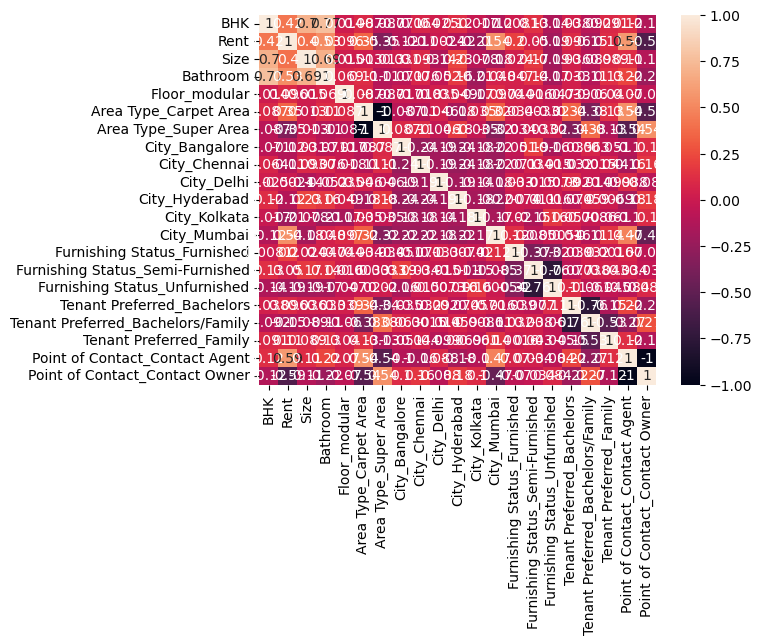

In [891]:
sns.heatmap(df.corr(), annot = True);

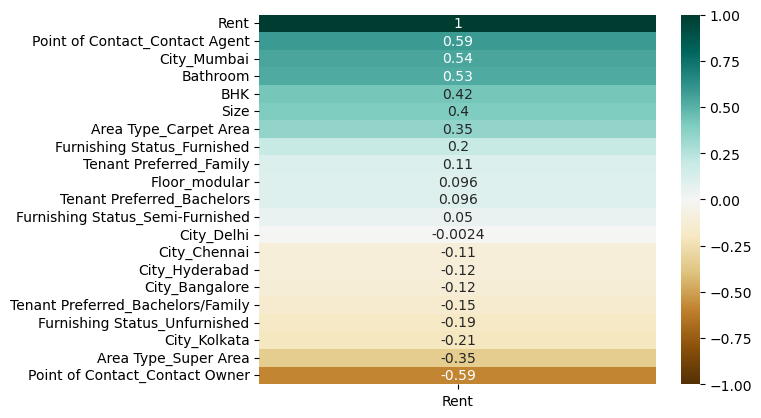

In [892]:
sns.heatmap(df.corr()[["Rent"]].sort_values(by = "Rent", 
            ascending = False),
            vmin = -1, 
            vmax = 1, 
            cmap = "BrBG", 
            annot = True);

In [893]:
df_test = df.iloc[0:5]

In [894]:
df_test

,BHK,Rent,Size,Bathroom,Floor_modular,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner
0,2,10000,1100,2,0.000000,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
1,2,20000,800,1,0.333333,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,2,17000,1000,1,0.333333,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,2,10000,800,1,0.500000,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
4,2,7500,850,1,0.500000,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1


In [895]:
df.drop(index = [0, 1, 2, 3, 4], axis = 1, inplace = True)

In [896]:
df.reset_index(inplace = True)

In [897]:
df.drop(columns = ["index"], inplace = True)

In [898]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4429 entries, 0 to 4428
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                4429 non-null   int64  
 1   Rent                               4429 non-null   int64  
 2   Size                               4429 non-null   int64  
 3   Bathroom                           4429 non-null   int64  
 4   Floor_modular                      4429 non-null   float64
 5   Area Type_Carpet Area              4429 non-null   uint8  
 6   Area Type_Super Area               4429 non-null   uint8  
 7   City_Bangalore                     4429 non-null   uint8  
 8   City_Chennai                       4429 non-null   uint8  
 9   City_Delhi                         4429 non-null   uint8  
 10  City_Hyderabad                     4429 non-null   uint8  
 11  City_Kolkata                       4429 non-null   uint8

In [899]:
# df = df[["Rent", "Size", "BHK_4", "City_Mumbai", "BHK_5", "Furnishing Status_Furnished", "Furnishing Status_Semi-Furnished", "BHK_6"]]

In [900]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Bathroom', 'Floor_modular',
       'Area Type_Carpet Area', 'Area Type_Super Area', 'City_Bangalore',
       'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai', 'Furnishing Status_Furnished',
       'Furnishing Status_Semi-Furnished', 'Furnishing Status_Unfurnished',
       'Tenant Preferred_Bachelors', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family', 'Point of Contact_Contact Agent',
       'Point of Contact_Contact Owner'],
      dtype='object')

In [901]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns = scaler.get_feature_names_out())
df

,BHK,Rent,Size,Bathroom,Floor_modular,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner
0,0.2,0.058704,0.098497,0.166667,0.000000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.2,0.089069,0.115192,0.166667,0.000000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.038462,0.040067,0.000000,0.250000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.2,0.251012,0.131886,0.166667,0.250000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.2,0.089069,0.165275,0.166667,0.166667,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4424,0.2,0.139676,0.165275,0.166667,0.300000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4425,0.4,0.281377,0.332220,0.333333,0.125000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4426,0.4,0.342105,0.290484,0.333333,0.300000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4427,0.4,0.443320,0.248748,0.166667,0.338235,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [902]:
# scaler = StandardScaler()
# df = scaler.fit_transform(df)
# df = pd.DataFrame(df, columns = scaler.get_feature_names_out())
# df


In [903]:
X = df.drop(columns = ["Rent"])
y = df["Rent"]

In [904]:
X

,BHK,Size,Bathroom,Floor_modular,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner
0,0.2,0.098497,0.166667,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.2,0.115192,0.166667,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.040067,0.000000,0.250000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.2,0.131886,0.166667,0.250000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.2,0.165275,0.166667,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4424,0.2,0.165275,0.166667,0.300000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4425,0.4,0.332220,0.333333,0.125000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4426,0.4,0.290484,0.333333,0.300000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4427,0.4,0.248748,0.166667,0.338235,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [905]:
y

0       0.058704
1       0.089069
2       0.038462
3       0.251012
4       0.089069
          ...   
4424    0.139676
4425    0.281377
4426    0.342105
4427    0.443320
4428    0.139676
Name: Rent, Length: 4429, dtype: float64

In [906]:
y.max()

1.0

In [907]:
y.min()

0.0

In [908]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42)

In [909]:
x_train

,BHK,Size,Bathroom,Floor_modular,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner
3038,0.0,0.106845,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1096,0.0,0.043406,0.166667,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4154,0.4,0.305509,0.333333,0.250000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3941,0.4,0.327212,0.333333,0.277778,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
979,0.2,0.106845,0.166667,0.250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0.2,0.156928,0.166667,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
466,0.2,0.131886,0.166667,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3092,0.2,0.148581,0.166667,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3772,0.4,0.234891,0.333333,0.116667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [910]:
x_test

,BHK,Size,Bathroom,Floor_modular,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner
2547,0.2,0.106845,0.000000,0.250000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
842,0.2,0.124374,0.166667,0.193548,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4080,0.2,0.148581,0.166667,0.166667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
964,0.0,0.090150,0.000000,0.250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
318,0.4,0.198664,0.166667,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.0,0.048414,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3565,0.2,0.146244,0.166667,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1434,0.2,0.115192,0.000000,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2295,0.0,0.008848,0.000000,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [911]:
y_train

3038    0.063765
1096    0.139676
4154    0.210526
3941    0.240891
979     0.544534
          ...   
3444    0.084008
466     0.089069
3092    0.109312
3772    0.564777
860     0.311741
Name: Rent, Length: 3100, dtype: float64

In [912]:
y_test

2547    0.109312
842     0.392713
4080    0.114372
964     0.230769
318     0.149798
          ...   
397     0.038462
3565    0.073887
1434    0.129555
2295    0.048583
2189    0.084008
Name: Rent, Length: 1329, dtype: float64

In [913]:
linear_regressor = LinearRegression()

In [914]:
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [915]:
y_pred = linear_regressor.predict(x_test)

In [916]:
linear_regressor.score(x_train, y_train)

0.6831266598076917

In [917]:
linear_regressor.score(x_test, y_test)

0.7055546327362168

In [918]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.01
Coefficient of determination: 0.71


In [919]:
x_test.shape

(1329, 20)

In [920]:
y_test.shape

(1329,)

In [921]:
y_pred.shape

(1329,)

<AxesSubplot: xlabel='Real', ylabel='Predição'>

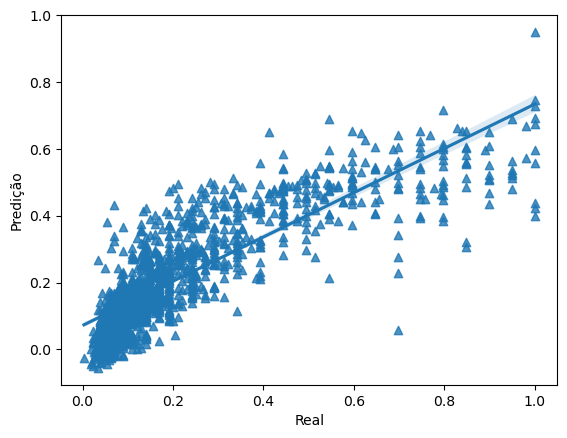

In [922]:
df_temp = pd.DataFrame({"Real": y_test, "Predição": y_pred})

sns.regplot(x = "Real", y = "Predição", marker = "^", data = df_temp)

# plt.xlim((0, 1))
# plt.ylim((0, 1));


In [923]:
from sklearn.ensemble import RandomForestRegressor

In [924]:
forest_regressor = RandomForestRegressor()

In [925]:
forest_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [926]:
y_pred_forest = forest_regressor.predict(x_test)

In [927]:
forest_regressor.score(x_train, y_train)

0.9607379511470397

In [928]:
forest_regressor.score(x_test, y_test)

0.7736596254634809

In [929]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_forest))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_forest))

Mean squared error: 0.01
Coefficient of determination: 0.77
